<a href="https://colab.research.google.com/github/icaglar33/finalproject/blob/main/Final_project_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, Clean, Convert and Merge the datasets

In [1]:
#import os
#os._exit(00)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Function to load datasets
def load_data(file_path, nrows=None):
    data = pd.read_excel(file_path, nrows=nrows)
    return data

# Function to merge all datasets
def merge_all_datasets(exit_entry_data, unemployment_data, interest_rate_data, gdp_data, cpi_data):
    # Merge datasets with proper suffixes for overlapping columns
    merged_data = exit_entry_data.merge(unemployment_data, on='Date', how='outer', suffixes=('_exit_entry', '_unemployment')) \
                                  .merge(interest_rate_data, on='Date', how='outer', suffixes=('_unemployment', '_interest_rate')) \
                                  .merge(gdp_data, on='Date', how='outer', suffixes=('_interest_rate', '_gdp')) \
                                  .merge(cpi_data, on='Date', how='outer', suffixes=('_gdp', '_cpi'))

    print(merged_data.head())
    return merged_data

# Load datasets
exit_entry_data = load_data("/content/drive/MyDrive/project data/entry_exit_data.xlsx")
unemployment_data = load_data("/content/drive/MyDrive/project data/unemployment_data.xlsx")
interest_rate_data = load_data("/content/drive/MyDrive/project data/interest_rate_data.xlsx")
# Restrict GDP to 80 rows
gdp_data = load_data("/content/drive/MyDrive/project data/gdp_data.xlsx", nrows=80)
cpi_data = load_data("/content/drive/MyDrive/project data/cpi_data.xlsx")

# Merge all datasets
merged_data = merge_all_datasets(exit_entry_data, unemployment_data, interest_rate_data, gdp_data, cpi_data)


         Date  Entry rate  Exit rate  Unemployment Rate  \
0  2000-01-01         NaN      13.67           6.866667   
1  2000-04-01         NaN      13.13           6.666667   
2  2000-07-01         NaN      13.35           6.900000   
3  2000-10-01         NaN      12.22           6.900000   
4  2001-01-01       14.51      12.54           7.000000   

   Long Term Interest Rate      GDP  Inflation Rate  
0                 6.286111  1426823             1.4  
1                 6.011555  1443782             1.5  
2                 5.786455  1458465             1.8  
3                 5.617527  1460962             1.8  
4                 5.383333  1468700             2.4  


# EDA Report

In [18]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [19]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

# Generate EDA report
profile = ProfileReport(merged_data, title='Exploratory Data Analysis Report', explorative=True)

# Save EDA report as HTML
html_report_path = 'eda_report.html'
profile.to_file(html_report_path)

print(f'EDA report saved as {html_report_path}.')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report saved as eda_report.html.


# Formatting

Original Variable Names:
Index(['Date', 'Entry rate', 'Exit rate', 'Unemployment Rate',
       'Long Term Interest Rate', 'GDP', 'Inflation Rate'],
      dtype='object')

New Variable Names:
Index(['date', 'entry_rate', 'exit_rate', 'unemployment_rate', 'interest_rate',
       'GDP', 'cpi'],
      dtype='object')


# Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Display the original variable names
print("Original Variable Names:")
print(merged_data.columns)

# Create a mapping for consistent names
name_mapping = {
    'Date': 'date',
    'Number of active employer businesses in the private sector': 'active_businesses',
    'Number of entrants': 'entrants',
    'Number of exits': 'exits',
    'Entry rate': 'entry_rate',
    'Exit rate': 'exit_rate',
    'Unemployment Rate': 'unemployment_rate',
    'Long Term Interest Rate': 'interest_rate',
    'Gross domestic product at market prices': 'GDP',
    'Inflation Rate': 'cpi',
}

# Rename the columns using the mapping
merged_data.rename(columns=name_mapping, inplace=True)

# Display the new variable names
print("\nNew Variable Names:")
print(merged_data.columns)

# Select relevant features and target variables
features = ['unemployment_rate', 'interest_rate', 'GDP', 'cpi']  # Updated to match the case
target_entry = 'entry_rate'
target_exit = 'exit_rate'

# Combine features and target variable for entry rate
data_entry = merged_data[features + [target_entry]].copy()

# Drop rows with NaN values for entry rate
data_entry = data_entry.dropna()

# Split the data into training and testing sets for entry rate
X_train_entry, X_test_entry, y_train_entry, y_test_entry = train_test_split(
    data_entry[features], data_entry[target_entry], test_size=0.2, random_state=42
)

# Initialize the decision tree model for entry rate
tree_model_entry = DecisionTreeRegressor(random_state=42)

# Train the model for entry rate
tree_model_entry.fit(X_train_entry, y_train_entry)

# Make predictions on the testing set for entry rate
tree_predictions_entry = tree_model_entry.predict(X_test_entry)


# Evaluate the model for entry rate
tree_mse_entry = mean_squared_error(y_test_entry, tree_predictions_entry)
print(f'Decision Tree (Entry Rate) Mean Squared Error: {tree_mse_entry}')

# Combine features and target variable for exit rate
data_exit = merged_data[features + [target_exit]].copy()

# Drop rows with NaN values for exit rate
data_exit = data_exit.dropna()

# Split the data into training and testing sets for exit rate
X_train_exit, X_test_exit, y_train_exit, y_test_exit = train_test_split(
    data_exit[features], data_exit[target_exit], test_size=0.2, random_state=42
)

# Initialize the decision tree model for exit rate
tree_model_exit = DecisionTreeRegressor(random_state=42)

# Train the model for exit rate
tree_model_exit.fit(X_train_exit, y_train_exit)

# Make predictions on the testing set for exit rate
tree_predictions_exit = tree_model_exit.predict(X_test_exit)


# Evaluate the model for exit rate
tree_mse_exit = mean_squared_error(y_test_exit, tree_predictions_exit)
print(f'Decision Tree (Exit Rate) Mean Squared Error: {tree_mse_exit}')


Original Variable Names:
Index(['date', 'entry_rate', 'exit_rate', 'unemployment_rate', 'interest_rate',
       'GDP', 'cpi'],
      dtype='object')

New Variable Names:
Index(['date', 'entry_rate', 'exit_rate', 'unemployment_rate', 'interest_rate',
       'GDP', 'cpi'],
      dtype='object')
Decision Tree (Entry Rate) Mean Squared Error: 0.38752500000000023
Decision Tree (Exit Rate) Mean Squared Error: 0.15196874999999982


In [50]:
import numpy as np

# Create a DataFrame for future quarters (2020Q1 to 2030Q4)
future_quarters = pd.date_range(start='2020-01-01', end='2030-12-31', freq='Q')
future_data = pd.DataFrame({'Date': future_quarters})

# Include relevant features
np.random.seed(42)
future_data['unemployment_rate'] = np.random.uniform(3, 6, size=len(future_data))
future_data['interest_rate'] = np.random.uniform(1, 5, size=len(future_data))
future_data['GDP'] = np.random.uniform(10000, 50000, size=len(future_data))
future_data['cpi'] = np.random.uniform(1, 3, size=len(future_data))

# Check for missing values in future_data
print("Missing Values in future_data:")
print(future_data.isnull().sum())

# Make predictions for entry rate and exit rate using the original features
predictions_entry = tree_model_entry.predict(future_data[features])
predictions_exit = tree_model_exit.predict(future_data[features])

# Add predicted values to the future_data DataFrame
future_data['Predicted_Entry_Rate'] = predictions_entry
future_data['Predicted_Exit_Rate'] = predictions_exit

# Display the prediction results
print(future_data[['Date', 'Predicted_Entry_Rate', 'Predicted_Exit_Rate']])


Missing Values in future_data:
Date                 0
unemployment_rate    0
interest_rate        0
GDP                  0
cpi                  0
dtype: int64
         Date  Predicted_Entry_Rate  Predicted_Exit_Rate
0  2020-03-31                 12.79                11.27
1  2020-06-30                 12.75                12.25
2  2020-09-30                 13.92                11.09
3  2020-12-31                 12.48                11.27
4  2021-03-31                 13.92                11.09
5  2021-06-30                 13.92                11.09
6  2021-09-30                 12.75                12.22
7  2021-12-31                 12.75                12.84
8  2022-03-31                 12.75                12.84
9  2022-06-30                 12.75                12.09
10 2022-09-30                 13.92                11.09
11 2022-12-31                 12.75                12.09
12 2023-03-31                 12.79                11.27
13 2023-06-30                 12.79        

**Evaluation Metrics:**

In [42]:
# Mean Squared Error (MSE):

print(f'Decision Tree (Entry Rate) Mean Squared Error: {tree_mse_entry}')
print(f'Decision Tree (Exit Rate) Mean Squared Error: {tree_mse_exit}')

Decision Tree (Entry Rate) Mean Squared Error: 0.38752500000000023
Decision Tree (Exit Rate) Mean Squared Error: 0.15196874999999982


In [43]:
# R-squared (R2):

from sklearn.metrics import r2_score

r2_entry = r2_score(y_test_entry, tree_predictions_entry)
r2_exit = r2_score(y_test_exit, tree_predictions_exit)

print(f'Decision Tree (Entry Rate) R-squared: {r2_entry}')
print(f'Decision Tree (Exit Rate) R-squared: {r2_exit}')

Decision Tree (Entry Rate) R-squared: 0.5654862407742953
Decision Tree (Exit Rate) R-squared: 0.6659014965902275


In [44]:
# Overfitting:

tree_predictions_entry_train = tree_model_entry.predict(X_train_entry)
tree_mse_entry_train = mean_squared_error(y_train_entry, tree_predictions_entry_train)

tree_predictions_exit_train = tree_model_exit.predict(X_train_exit)
tree_mse_exit_train = mean_squared_error(y_train_exit, tree_predictions_exit_train)

print(f'Decision Tree (Entry Rate) Train Mean Squared Error: {tree_mse_entry_train}')
print(f'Decision Tree (Exit Rate) Train Mean Squared Error: {tree_mse_exit_train}')

Decision Tree (Entry Rate) Train Mean Squared Error: 0.0
Decision Tree (Exit Rate) Train Mean Squared Error: 0.0


In [45]:
# Cross-Validation

from sklearn.model_selection import cross_val_score

# For entry rate
cross_val_scores_entry = cross_val_score(tree_model_entry, data_entry[features], data_entry[target_entry], cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE (Entry Rate): {np.mean(-cross_val_scores_entry)}')

# For exit rate
cross_val_scores_exit = cross_val_score(tree_model_exit, data_exit[features], data_exit[target_exit], cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE (Exit Rate): {np.mean(-cross_val_scores_exit)}')

Cross-Validation MSE (Entry Rate): 0.8492019166666663
Cross-Validation MSE (Exit Rate): 0.39122874999999996


In [46]:
# Comparison with Liner Regression

from sklearn.linear_model import LinearRegression

# For entry rate
linear_model_entry = LinearRegression()
linear_model_entry.fit(X_train_entry, y_train_entry)
linear_predictions_entry = linear_model_entry.predict(X_test_entry)
linear_mse_entry = mean_squared_error(y_test_entry, linear_predictions_entry)
print(f'Linear Regression (Entry Rate) Mean Squared Error: {linear_mse_entry}')

# For exit rate
linear_model_exit = LinearRegression()
linear_model_exit.fit(X_train_exit, y_train_exit)
linear_predictions_exit = linear_model_exit.predict(X_test_exit)
linear_mse_exit = mean_squared_error(y_test_exit, linear_predictions_exit)
print(f'Linear Regression (Exit Rate) Mean Squared Error: {linear_mse_exit}')


Linear Regression (Entry Rate) Mean Squared Error: 0.29658807835114814
Linear Regression (Exit Rate) Mean Squared Error: 0.11295939204893843


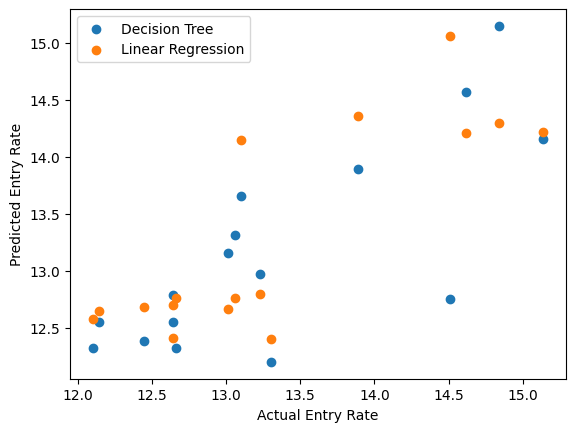

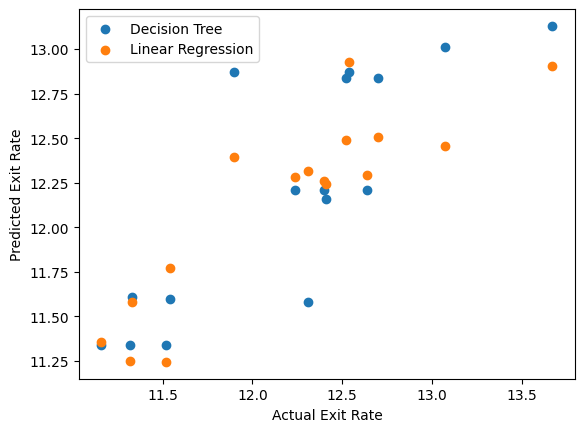

In [47]:
import matplotlib.pyplot as plt

# For entry rate
plt.scatter(y_test_entry, tree_predictions_entry, label='Decision Tree')
plt.scatter(y_test_entry, linear_predictions_entry, label='Linear Regression')
plt.xlabel('Actual Entry Rate')
plt.ylabel('Predicted Entry Rate')
plt.legend()
plt.show()

# For exit rate
plt.scatter(y_test_exit, tree_predictions_exit, label='Decision Tree')
plt.scatter(y_test_exit, linear_predictions_exit, label='Linear Regression')
plt.xlabel('Actual Exit Rate')
plt.ylabel('Predicted Exit Rate')
plt.legend()
plt.show()